In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import scipy as sp
from scipy import spatial

In [19]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [20]:
d = h5['sound_data']

In [21]:
sample_nums = np.random.choice(range(3388858), 10000, replace = False)

In [22]:
index = np.zeros(d.shape[0]).astype('bool')
index[sample_nums] = True

# Clustering on 45 dimensions

In [23]:
pca_45 = sklearnPCA(45)  # project from 64 to 2 dimensions
projected_45 = pca_45.fit_transform(d['feature_vector'])

In [24]:
projected_tsne_45 = TSNE(n_components=2).fit_transform(projected_45[index])

# Birch Clusters on Small Sample

Plot 1: n_clusters = 5, silhouette score = 0.17186011, calinski harabasz score = 3307.6779299682375, davies bouldin score = 2.1387150166003277
Plot 2: n_clusters = 6, silhouette score = 0.16984838, calinski harabasz score = 2886.660447221149, davies bouldin score = 1.9687580801570392
Plot 3: n_clusters = 7, silhouette score = 0.17693163, calinski harabasz score = 2546.781078881293, davies bouldin score = 1.887166530229773
Plot 4: n_clusters = 8, silhouette score = 0.13514102, calinski harabasz score = 2300.197050182167, davies bouldin score = 1.9297883321628047
Plot 5: n_clusters = 9, silhouette score = 0.12681553, calinski harabasz score = 2113.9974248037984, davies bouldin score = 2.0885436817399037
Plot 6: n_clusters = 10, silhouette score = 0.12565427, calinski harabasz score = 1954.7250474053528, davies bouldin score = 2.206911819521868
Plot 7: n_clusters = 11, silhouette score = 0.12869425, calinski harabasz score = 1830.0727718258624, davies bouldin score = 2.1654794017814902
Pl

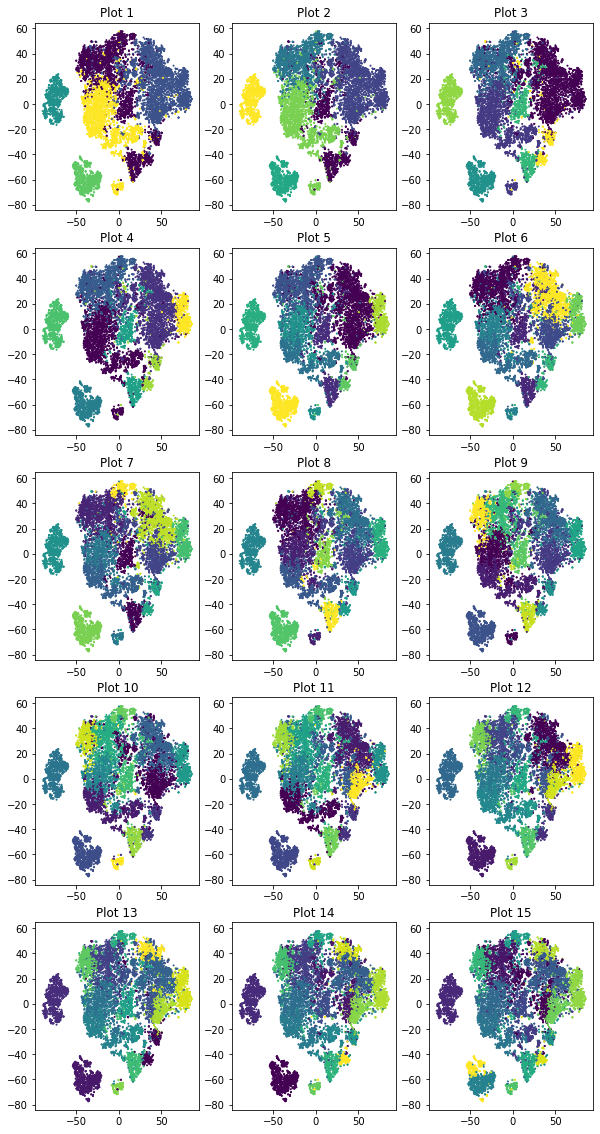

In [25]:
plt.figure(figsize=(10, 20))
idx = 1
for num_clusters in range(5, 20):
    birch = Birch(n_clusters=num_clusters)
    birch_clusters = birch.fit_predict(projected_45[index])
    plt.subplot(5, 3, idx)
    plt.scatter(projected_tsne_45[:, 0], projected_tsne_45[:, 1], c=birch_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected_45[index], birch.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected_45[index], birch.labels_)
    d_b_score = davies_bouldin_score(projected_45[index], birch.labels_) 
    print('Plot ' + str(idx) + ': n_clusters = ' + str(num_clusters) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
plt.show()

In [26]:
#8 clusters seem to be good
birch = Birch(n_clusters=8)
birch_clusters = birch.fit_predict(projected_45[index])
birch.subcluster_centers_

array([[ 1.91773434e+01, -3.26683164e+00,  2.21132159e+00, ...,
         9.55658317e-01,  9.06693995e-01, -1.08411920e+00],
       [ 2.08604012e+01, -1.07414973e+00,  2.20426250e+00, ...,
         1.93546638e-01,  7.76757717e-01, -6.09082341e-01],
       [ 1.92271194e+01, -1.28643143e+00,  1.95385480e+00, ...,
        -1.44469533e-02,  2.03566134e-01, -6.48867846e-01],
       ...,
       [ 6.90894032e+00,  7.18240690e+00,  1.59166825e+00, ...,
        -5.83907783e-01, -6.20970391e-02,  1.43765062e-01],
       [ 7.67239475e+00,  4.83155823e+00,  1.82885551e+00, ...,
        -6.84223354e-01, -1.84192210e-01,  4.57085997e-01],
       [ 6.03116560e+00,  6.10338545e+00,  2.70644689e+00, ...,
        -5.35948634e-01, -2.69309342e-01, -3.66647929e-01]])

# Nearest Neighbors and Corresponding Audio Files

In [29]:
tree = spatial.KDTree(projected_45[index])